In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("nyc_taxi_trip_duration.csv")

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [5]:
df["store_and_fwd_flag"].value_counts()

store_and_fwd_flag
N    725282
Y      4040
Name: count, dtype: int64

In [6]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])

df["computed_trip_duration"] = (df["dropoff_datetime"] - df["pickup_datetime"]).dt.total_seconds()

duration_match = (df["computed_trip_duration"] == df["trip_duration"]).all()

print(df[["trip_duration", "computed_trip_duration"]].head())

print("Do computed durations match the dataset? ", duration_match)


   trip_duration  computed_trip_duration
0            400                   400.0
1           1100                  1100.0
2           1635                  1635.0
3           1141                  1141.0
4            848                   848.0
Do computed durations match the dataset?  True


In [7]:
df.groupby("store_and_fwd_flag")["trip_duration"].describe()

,count,mean,std,min,25%,50%,75%,max
store_and_fwd_flag,,,,,,,,
N,725282.0,951.434656,3874.722023,1.0,397.00,662.0,1074.00,1939736.0
Y,4040.0,1094.857921,942.280647,2.0,460.75,825.0,1397.75,7824.0


In [8]:
Q1 = df["trip_duration"].quantile(0.25)
Q3 = df["trip_duration"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_below = (df["trip_duration"] < lower_bound).sum()
outliers_above = (df["trip_duration"] > upper_bound).sum()

print(f"Short trip outliers: {outliers_below}")
print(f"Long trip outliers: {outliers_above}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")


Short trip outliers: 0
Long trip outliers: 36963
Lower bound: -620.0, Upper bound: 2092.0


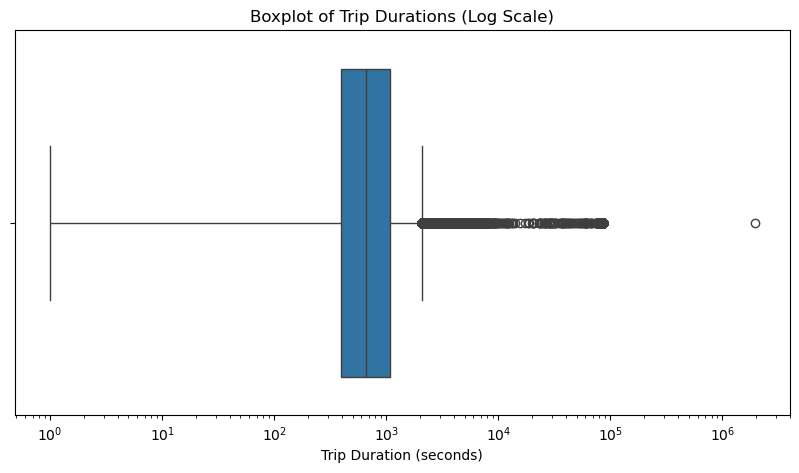

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["trip_duration"])
plt.xscale("log") 
plt.title("Boxplot of Trip Durations (Log Scale)")
plt.xlabel("Trip Duration (seconds)")
plt.show()


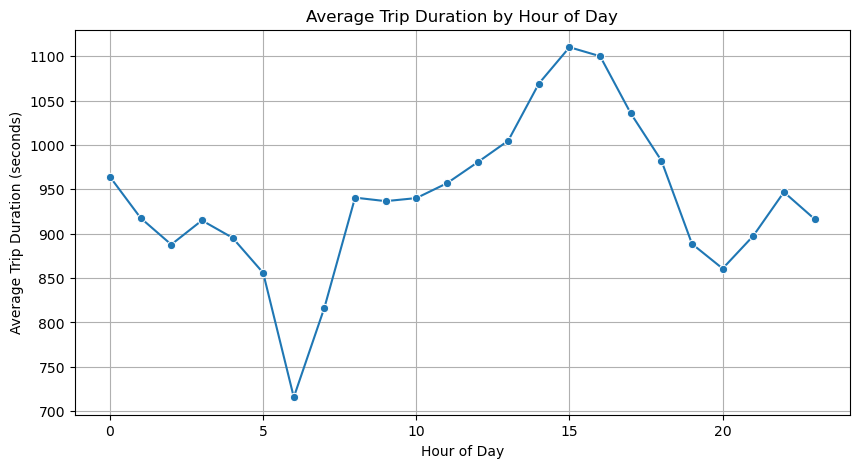

In [12]:
df["hour_of_day"] = df["pickup_datetime"].dt.hour

hourly_duration = df.groupby("hour_of_day")["trip_duration"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_duration.index, y=hourly_duration.values, marker="o")
plt.xlabel("Hour of Day")
plt.ylabel("Average Trip Duration (seconds)")
plt.title("Average Trip Duration by Hour of Day")
plt.grid(True)
plt.show()
